## Business Case Study - Porter Dataset

### Objective
#### Porter wants to get an estimated delivery time that it can provide to the customers on the basis of what they are ordering, from where and based on the delivery partners. 

In [1]:
# Import required libraries
# Usual libraries for data manipulation
# ****************************************************
import datetime as dt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Libraries for data visualization
# ****************************************************
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 

# Warnings handler
# ****************************************************
import warnings
warnings.filterwarnings('ignore')

# Libraries for Pre-processing
# ****************************************************
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Libraries for Models
# ****************************************************
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [3]:
from google.colab import files
uploaded = files.upload()

Saving porter_dataset.csv to porter_dataset.csv


In [171]:
# Load the data
data_df = pd.read_csv('/content/porter_dataset.csv')

In [172]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [ ]:
# Shape of the dataset
print("Given dataset contains {0} Rows and {1} Columns".format(data_df.shape[0], data_df.shape[1]))

Given dataset contains 197428 Rows and 14 Columns


In [ ]:
# Check for Count & Percentage of missing values in each column
missing_values = data_df.isna().sum().to_frame().sort_values(0, ascending=False).rename(columns={0:'Missing Values in the Dataset'})
missing_values['%'] = (missing_values['Missing Values in the Dataset']/len(data_df))*100
missing_values

,Missing Values in the Dataset,%
total_onshift_partners,16262,8.236927
total_busy_partners,16262,8.236927
total_outstanding_orders,16262,8.236927
store_primary_category,4760,2.411006
order_protocol,995,0.503981
market_id,987,0.499929
actual_delivery_time,7,0.003546
created_at,0,0.000000
store_id,0,0.000000
total_items,0,0.000000


In [ ]:
data_df.duplicated().sum()

0

In [ ]:
data_df.head()


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


### Data Pre-processing and Cleaning

In [173]:
# Fill the NaN values with 'Not Specified' for store primary category variable
data_df['store_primary_category'] = data_df['store_primary_category'].fillna("Not Specified")

In [ ]:
print("Number of Primary Store Categories: ", data_df['store_primary_category'].nunique())
data_df['store_primary_category'].unique()

Number of Primary Store Categories:  75


array(['american', 'mexican', 'Not Specified', 'indian', 'italian',
       'sandwich', 'thai', 'cafe', 'salad', 'pizza', 'chinese',
       'singaporean', 'burger', 'breakfast', 'mediterranean', 'japanese',
       'greek', 'catering', 'filipino', 'convenience-store', 'other',
       'korean', 'vegan', 'asian', 'barbecue', 'fast', 'dessert',
       'smoothie', 'seafood', 'vietnamese', 'cajun', 'steak',
       'middle-eastern', 'soup', 'vegetarian', 'persian', 'nepalese',
       'sushi', 'latin-american', 'hawaiian', 'chocolate', 'burmese',
       'british', 'pasta', 'alcohol', 'dim-sum', 'peruvian', 'turkish',
       'malaysian', 'ethiopian', 'afghan', 'bubble-tea', 'german',
       'french', 'caribbean', 'gluten-free', 'comfort-food', 'gastropub',
       'pakistani', 'moroccan', 'spanish', 'southern', 'tapas', 'russian',
       'brazilian', 'european', 'cheese', 'african', 'argentine',
       'kosher', 'irish', 'lebanese', 'belgian', 'indonesian',
       'alcohol-plus-food'], dtype=obje

##### pd datetime functions
pd.Timestamp: This function creates a pandas Timestamp object representing a specific date and time. 

pd.to_datetime: It is useful for converting a column of dates in a DataFrame or Series into the pandas Timestamp format.

pd.date_range: It allows to specify the start and end dates, as well as the frequency (e.g., daily, monthly, hourly) of the dates to be generated.

In [174]:
# Create a feature 'delivery time' to calculate the time taken for delivery
data_df['delivery_time'] = (pd.to_datetime(data_df['actual_delivery_time']) - pd.to_datetime(data_df['created_at'])).dt.total_seconds()

In [175]:
# Calculate hour of order creation 
data_df['created_at_hour'] = pd.to_datetime(data_df['created_at']).dt.hour

In [176]:
# Convert the datatype of few columns to category type
data_df['market_id'] = data_df['market_id'].astype('category')
data_df['store_id'] = data_df['store_id'].astype('category')
data_df['store_primary_category'] = data_df['store_primary_category'].astype('category')
data_df['order_protocol'] = data_df['order_protocol'].astype('category')

In [177]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 196441 non-null  category
 1   created_at                197428 non-null  object  
 2   actual_delivery_time      197421 non-null  object  
 3   store_id                  197428 non-null  category
 4   store_primary_category    197428 non-null  category
 5   order_protocol            196433 non-null  category
 6   total_items               197428 non-null  int64   
 7   subtotal                  197428 non-null  int64   
 8   num_distinct_items        197428 non-null  int64   
 9   min_item_price            197428 non-null  int64   
 10  max_item_price            197428 non-null  int64   
 11  total_onshift_partners    181166 non-null  float64 
 12  total_busy_partners       181166 non-null  float64 
 13  total_outstanding_orders  181

In [178]:
data_df = data_df.drop(['store_id'], axis=1)

### Exploratory Data Analysis (EDA)

In [179]:
data = data_df.sort_values(by='created_at_hour', ascending=True)
data['created_at_hour'].value_counts()

2     36976
1     28190
3     27068
20    15560
4     15250
19    13541
0     12669
21    11465
22     8821
23     8163
5      7096
18     5100
17     3413
16     2109
6      1416
15      538
14       40
7        11
8         2
Name: created_at_hour, dtype: int64

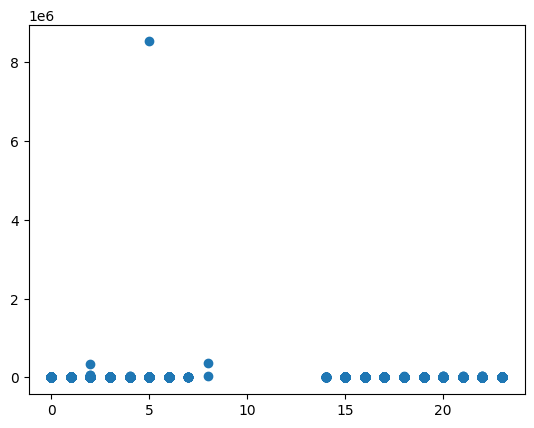

In [ ]:
plt.scatter(data['created_at'], data['delivery_time'])
plt.show()

In [180]:
# Calculate hour of order creation 
data_df['created_day'] = pd.to_datetime(data_df['created_at']).dt.day

In [181]:
data = data_df.sort_values(by='created_day', ascending=True)
data['created_day'].value_counts()

7     9149
15    9087
14    9016
8     8874
24    8230
31    8146
25    7934
16    7932
1     7724
13    7383
9     7278
6     7118
5     6850
12    6784
30    6763
2     6715
23    6611
11    6403
3     6369
4     6113
10    6091
17    6078
29    6038
22    6001
28    5669
27    5524
26    5478
18    3981
21    2088
19       1
Name: created_day, dtype: int64

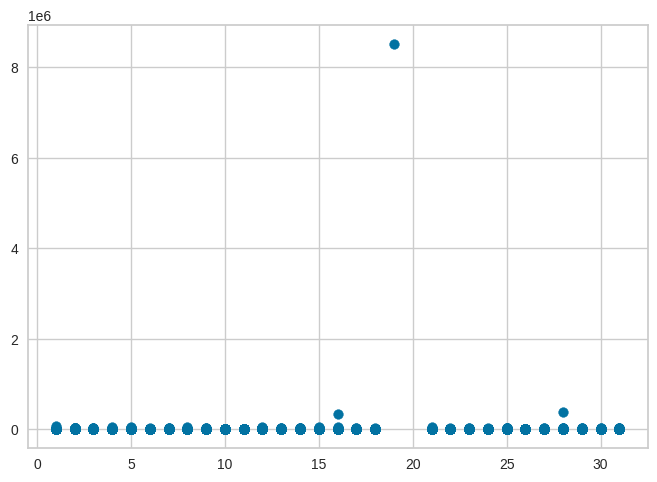

In [182]:
plt.scatter(data['created_day'], data['delivery_time'])
plt.show()

In [183]:
# Create a working copy of the dataset for analysis
work_df = data_df.copy()

## Univariate Analysis

#### Graphical Analysis of Continuous Variables

In [ ]:
# Create helper method to display histograms
def plot_num_variables(data, var: str):
  title = str(" Distribution of " + var + " ")
  title = title.center(150, '*')
  print('\n', title)
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
  sns.histplot(data, x=var, ax=axes[0])
  sns.kdeplot(data, x=var, ax=axes[1])
  sns.boxplot(data, x=var, ax=axes[2])
  plt.tight_layout()
  plt.show()

In [44]:
num_columns = work_df.select_dtypes('number')


 ************************************************************* Distribution of created_at *************************************************************


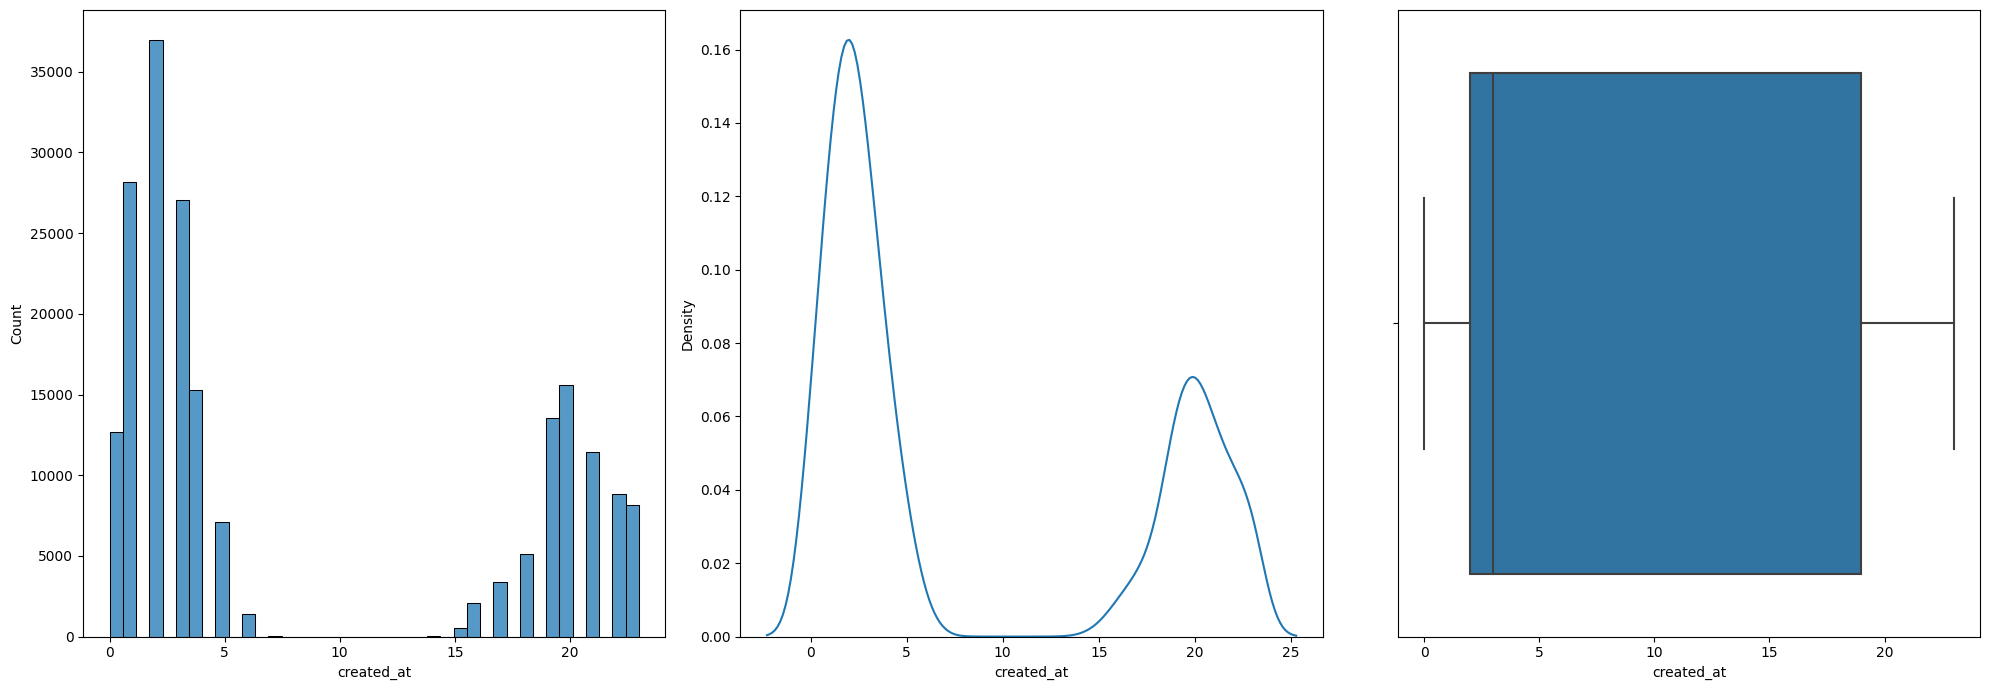


 ************************************************************ Distribution of total_items *************************************************************


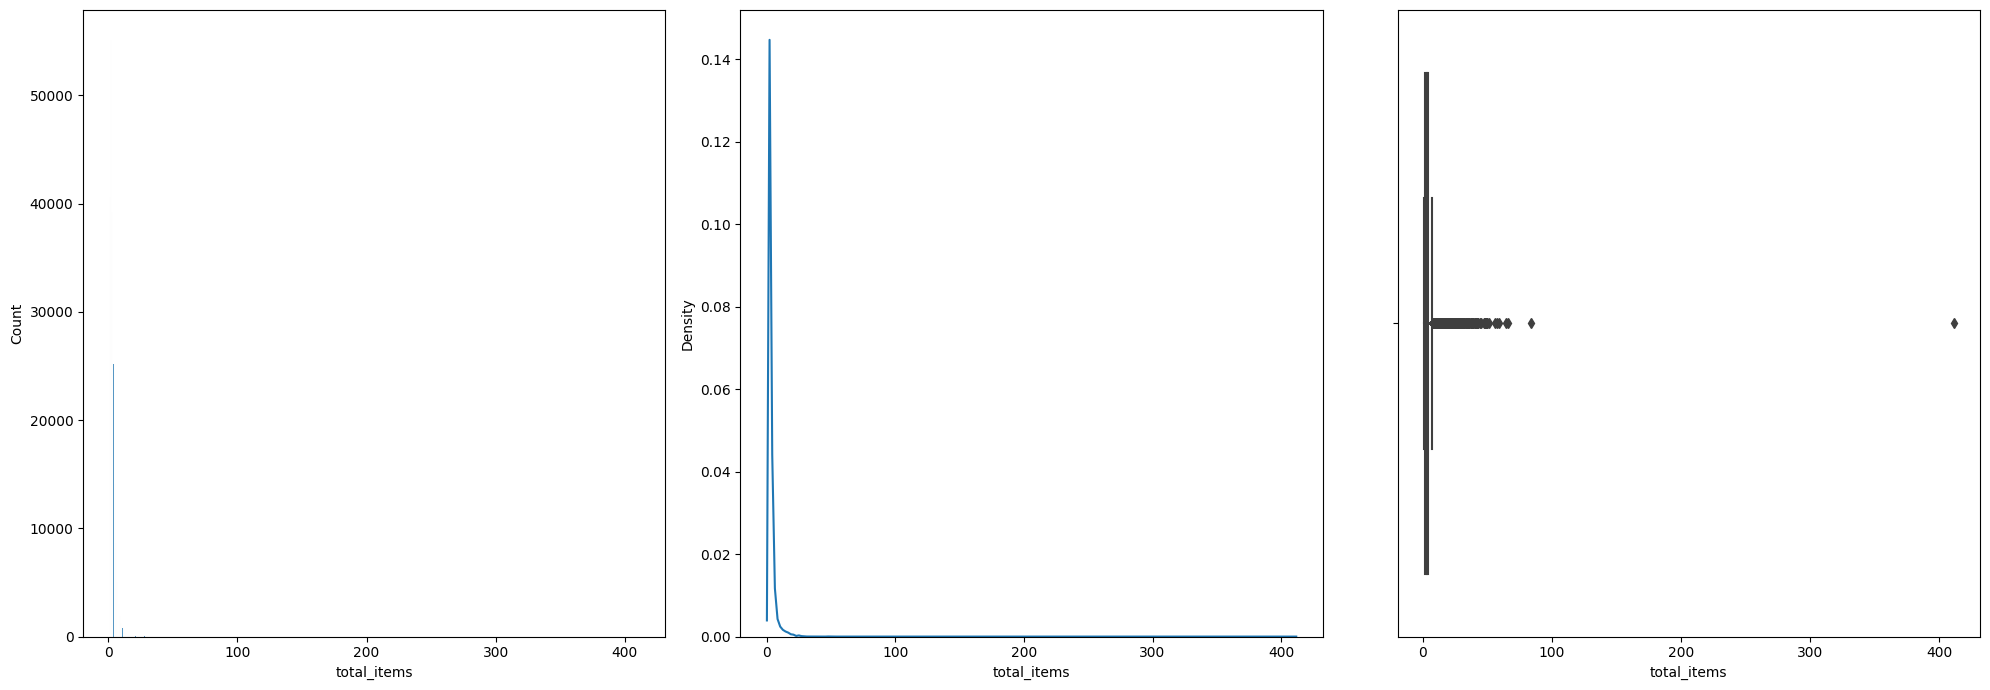


 ************************************************************** Distribution of subtotal **************************************************************


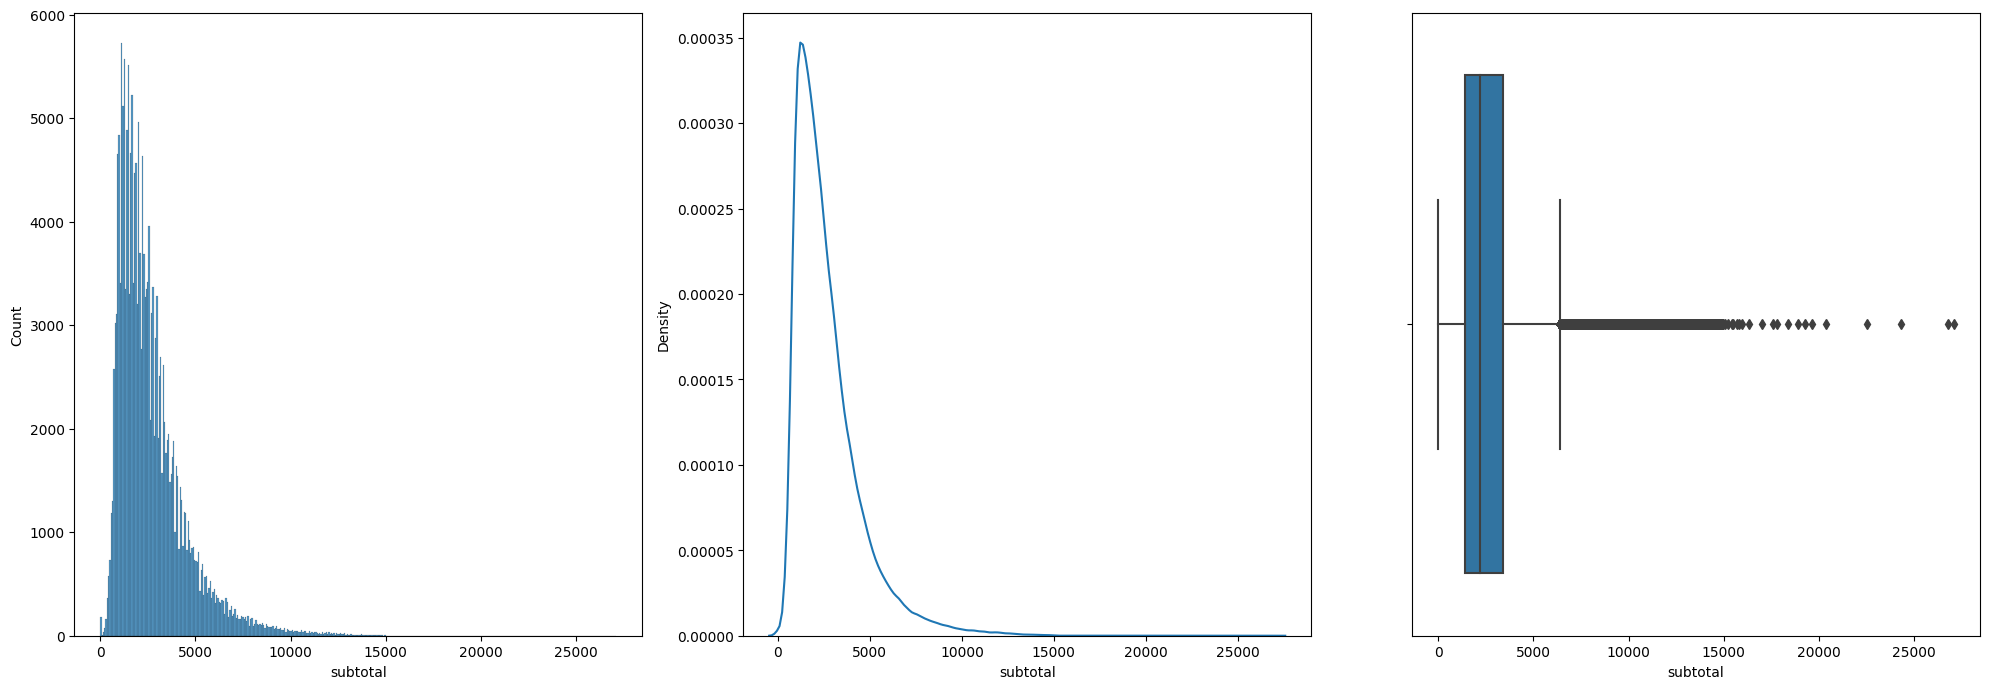


 ********************************************************* Distribution of num_distinct_items *********************************************************


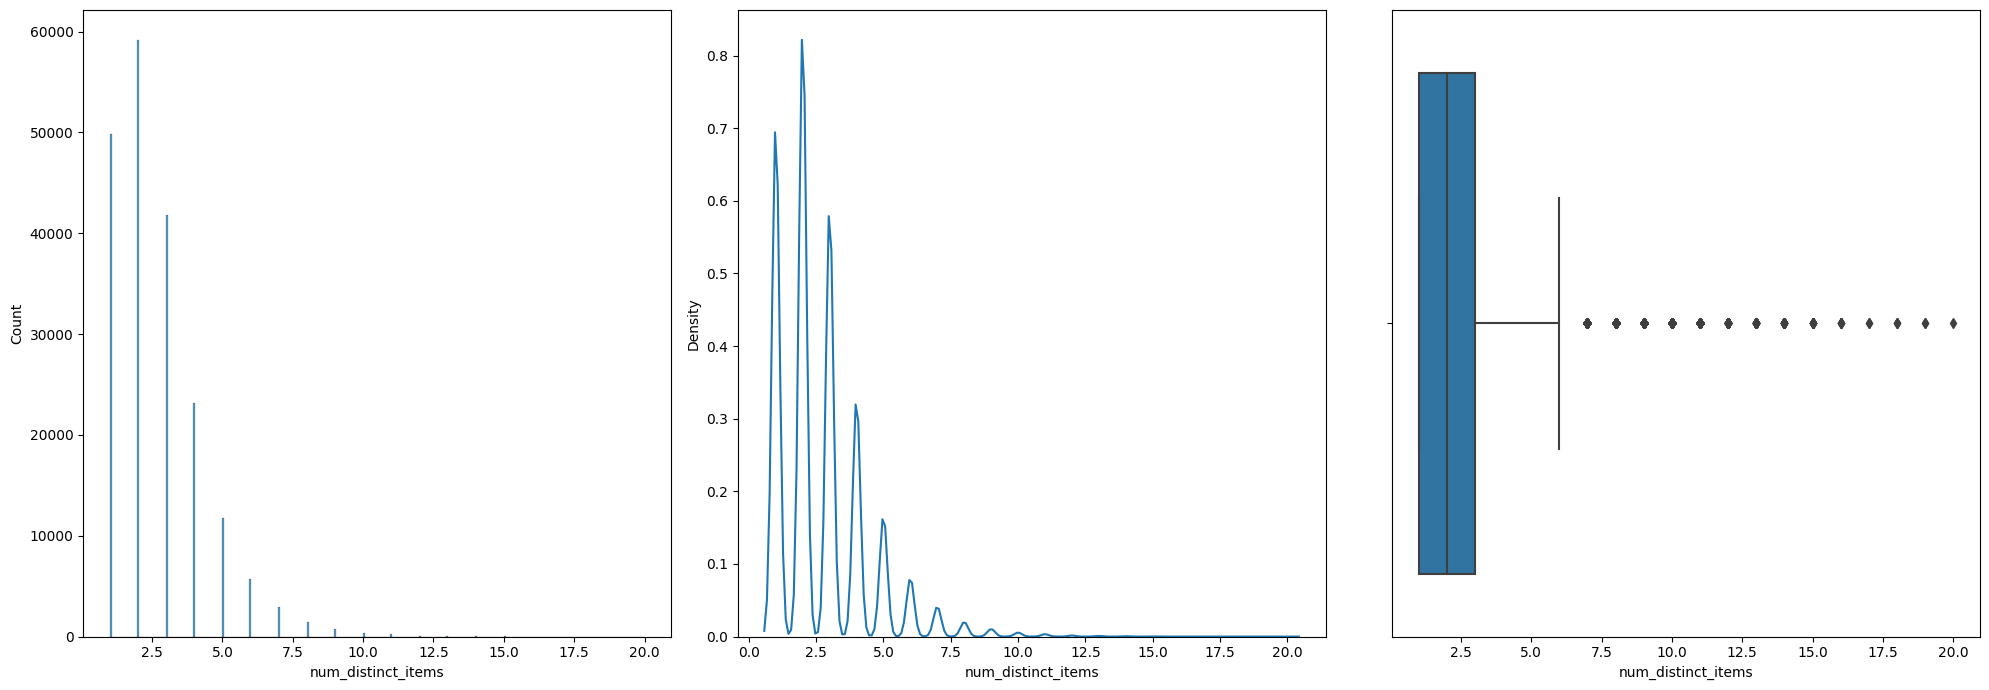


 *********************************************************** Distribution of min_item_price ***********************************************************


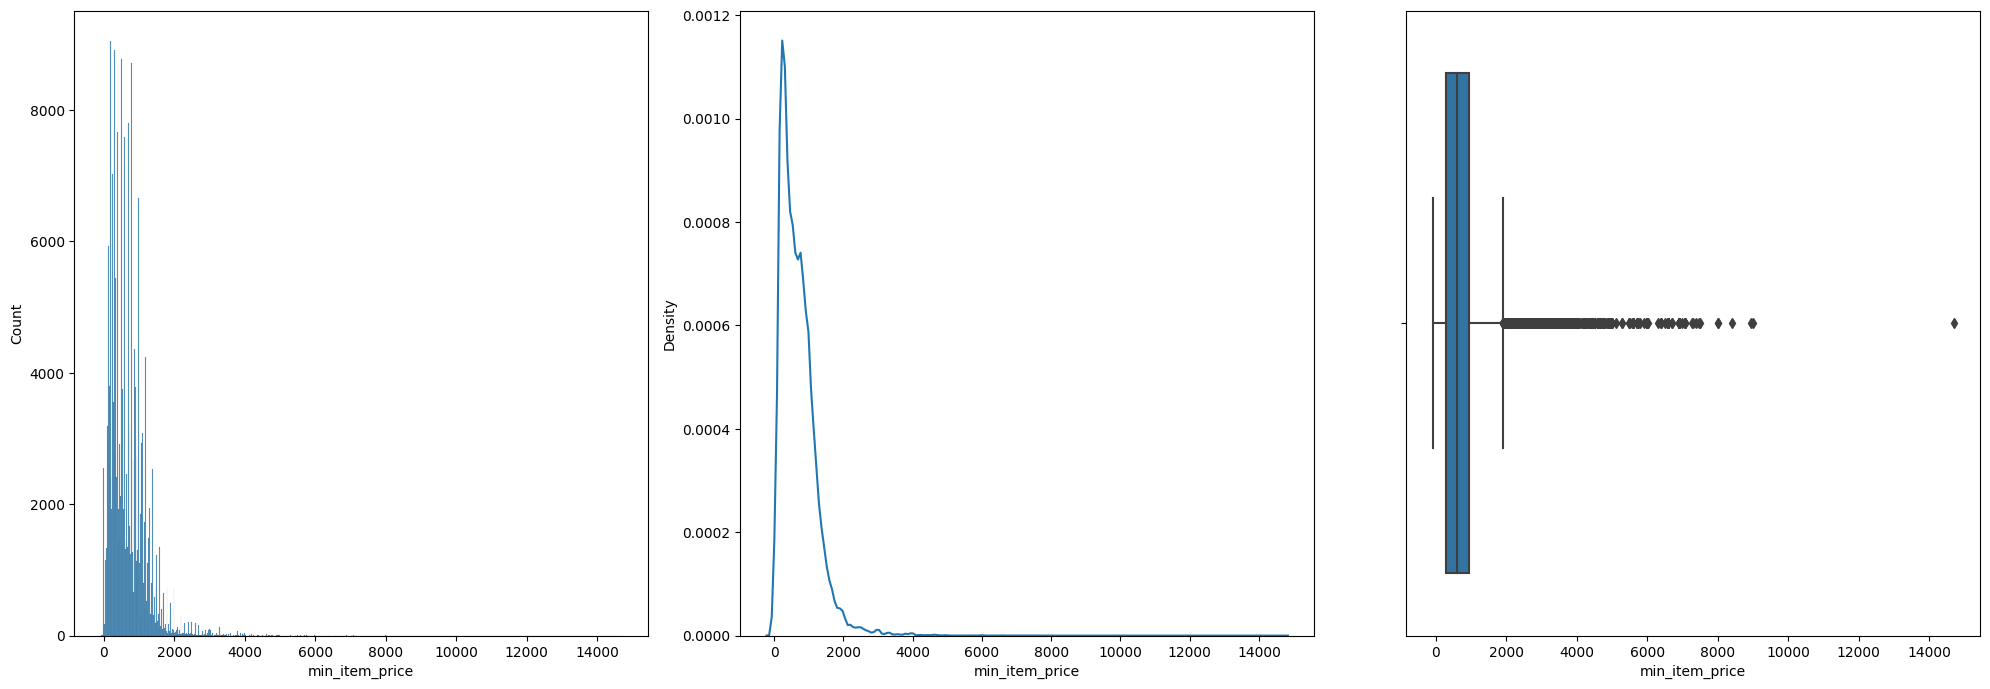


 *********************************************************** Distribution of max_item_price ***********************************************************


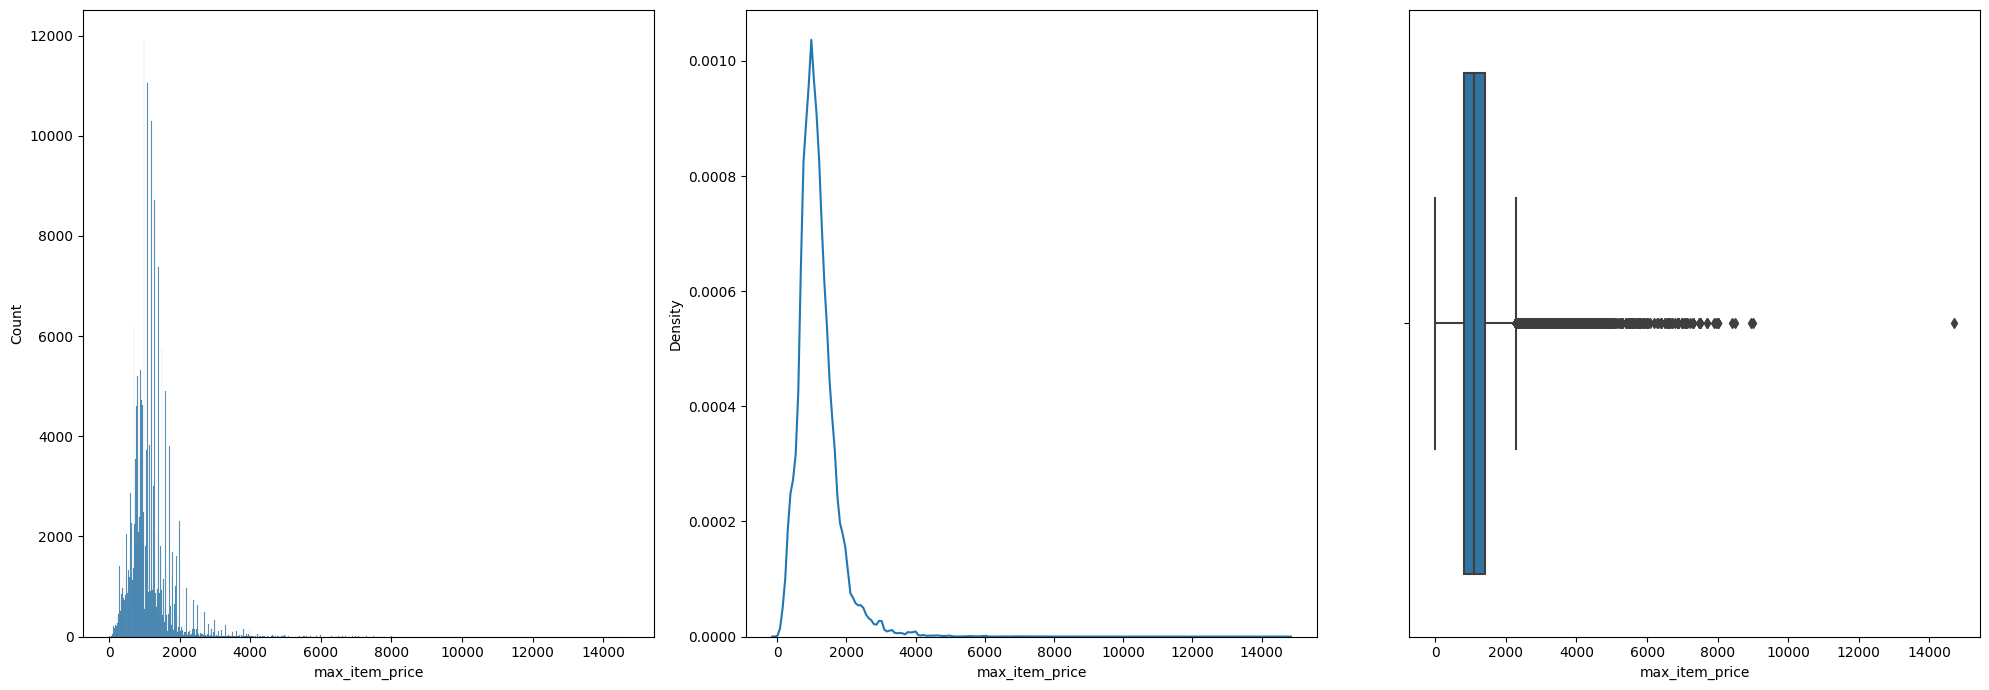


 ******************************************************* Distribution of total_onshift_partners *******************************************************


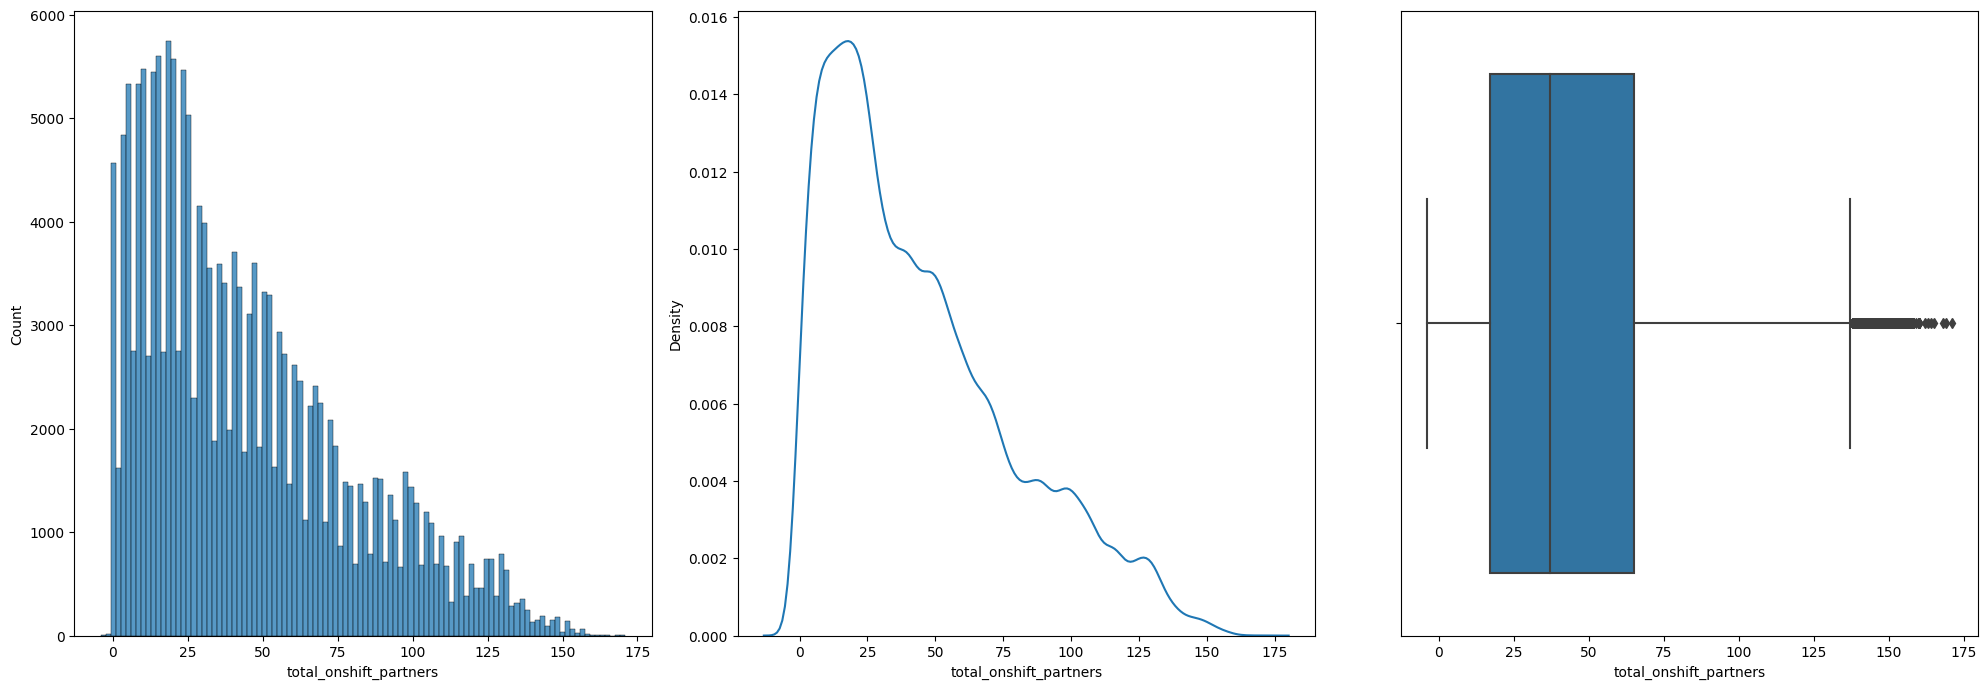


 ******************************************************** Distribution of total_busy_partners *********************************************************


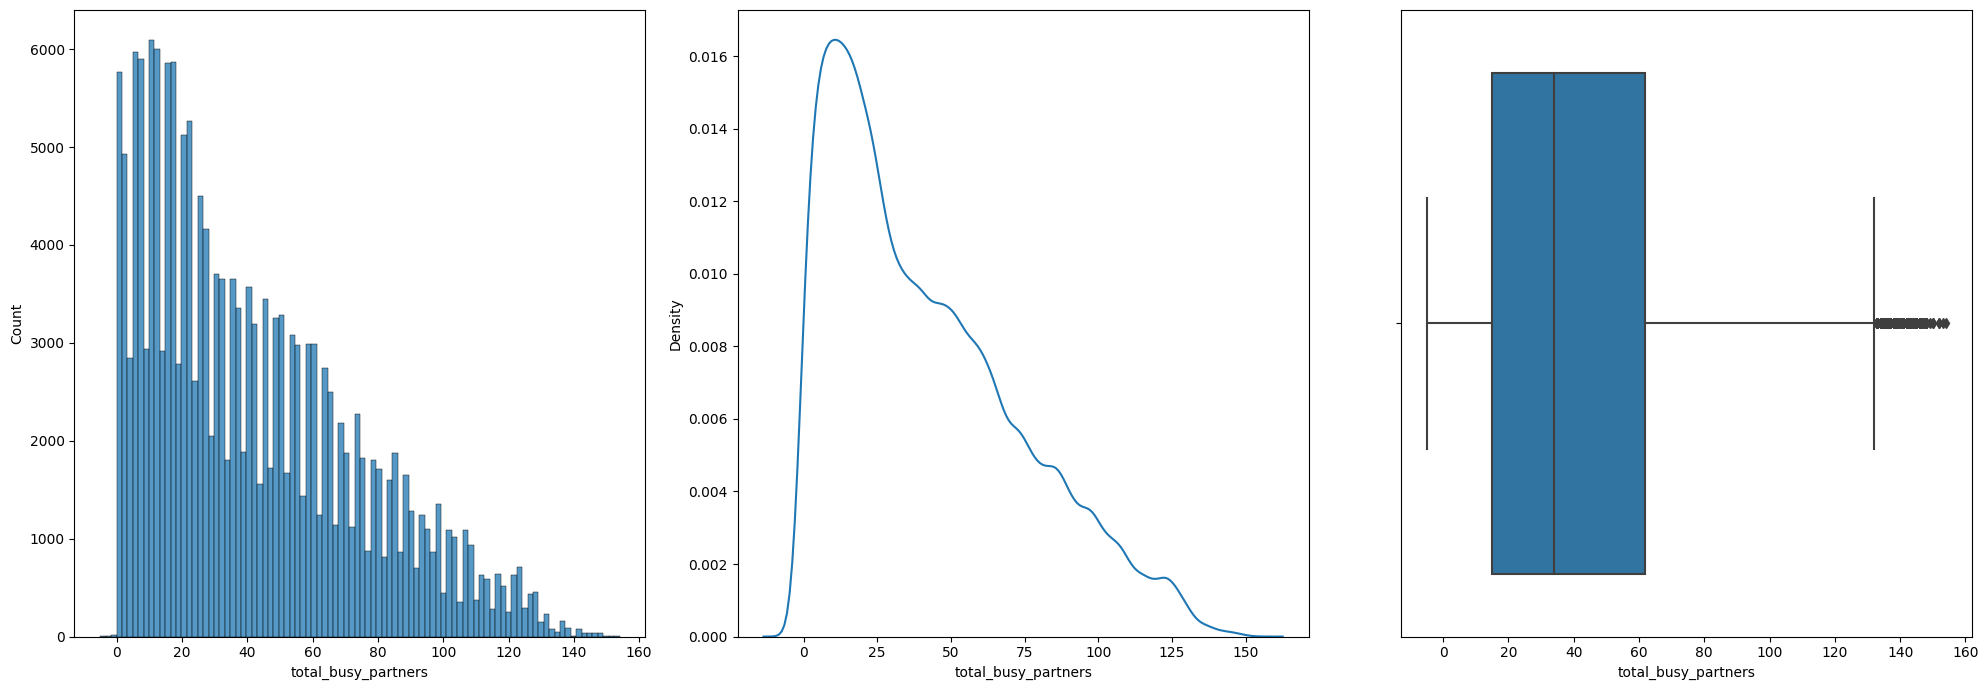


 ****************************************************** Distribution of total_outstanding_orders ******************************************************


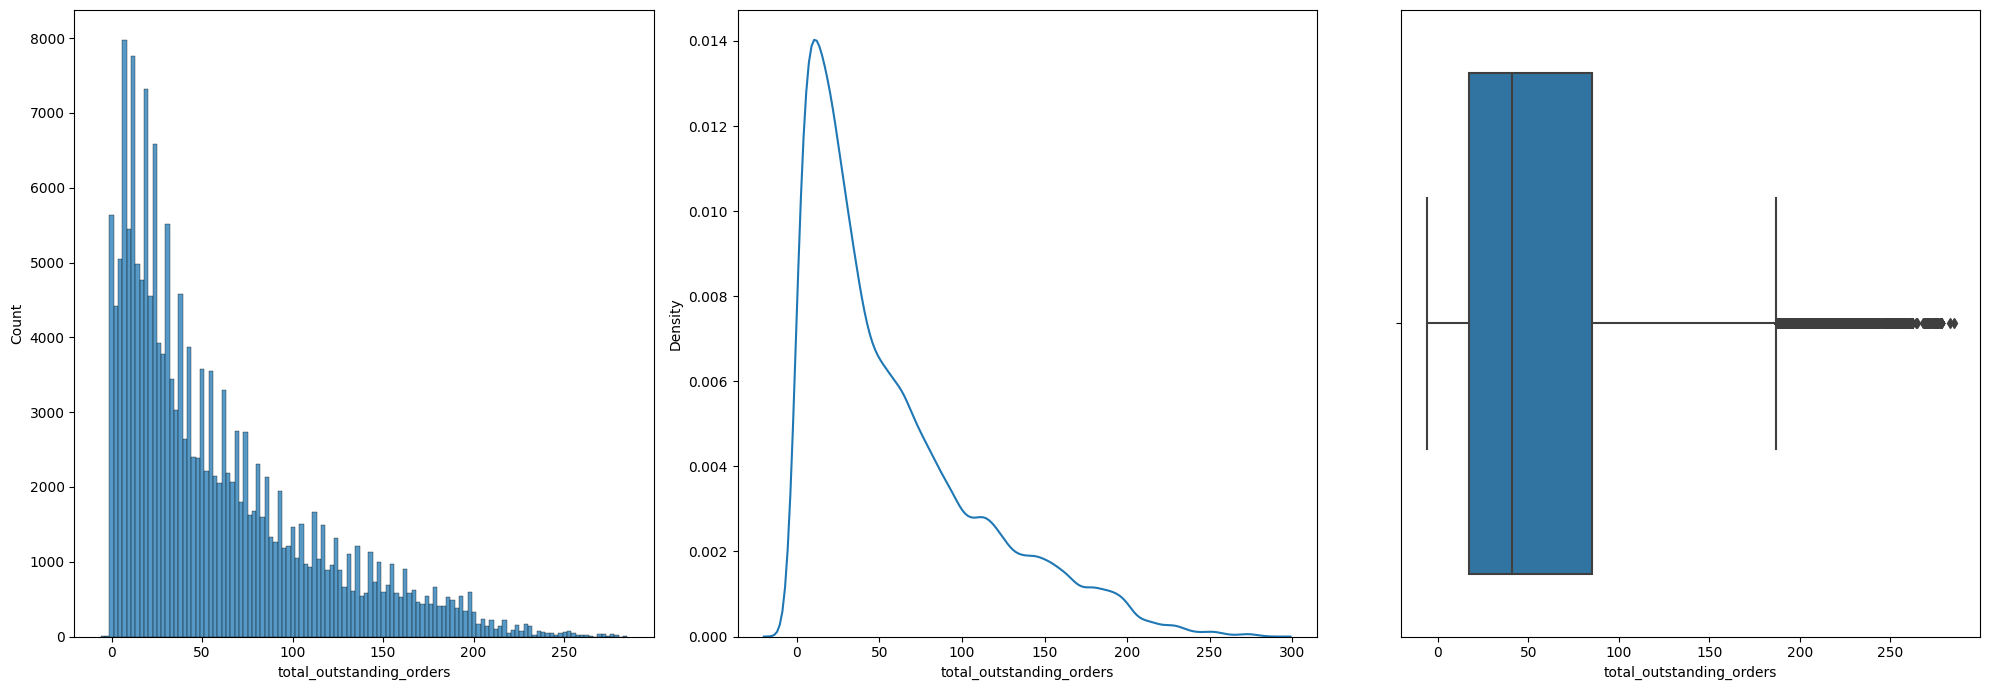


 *********************************************************** Distribution of delivery_time ************************************************************


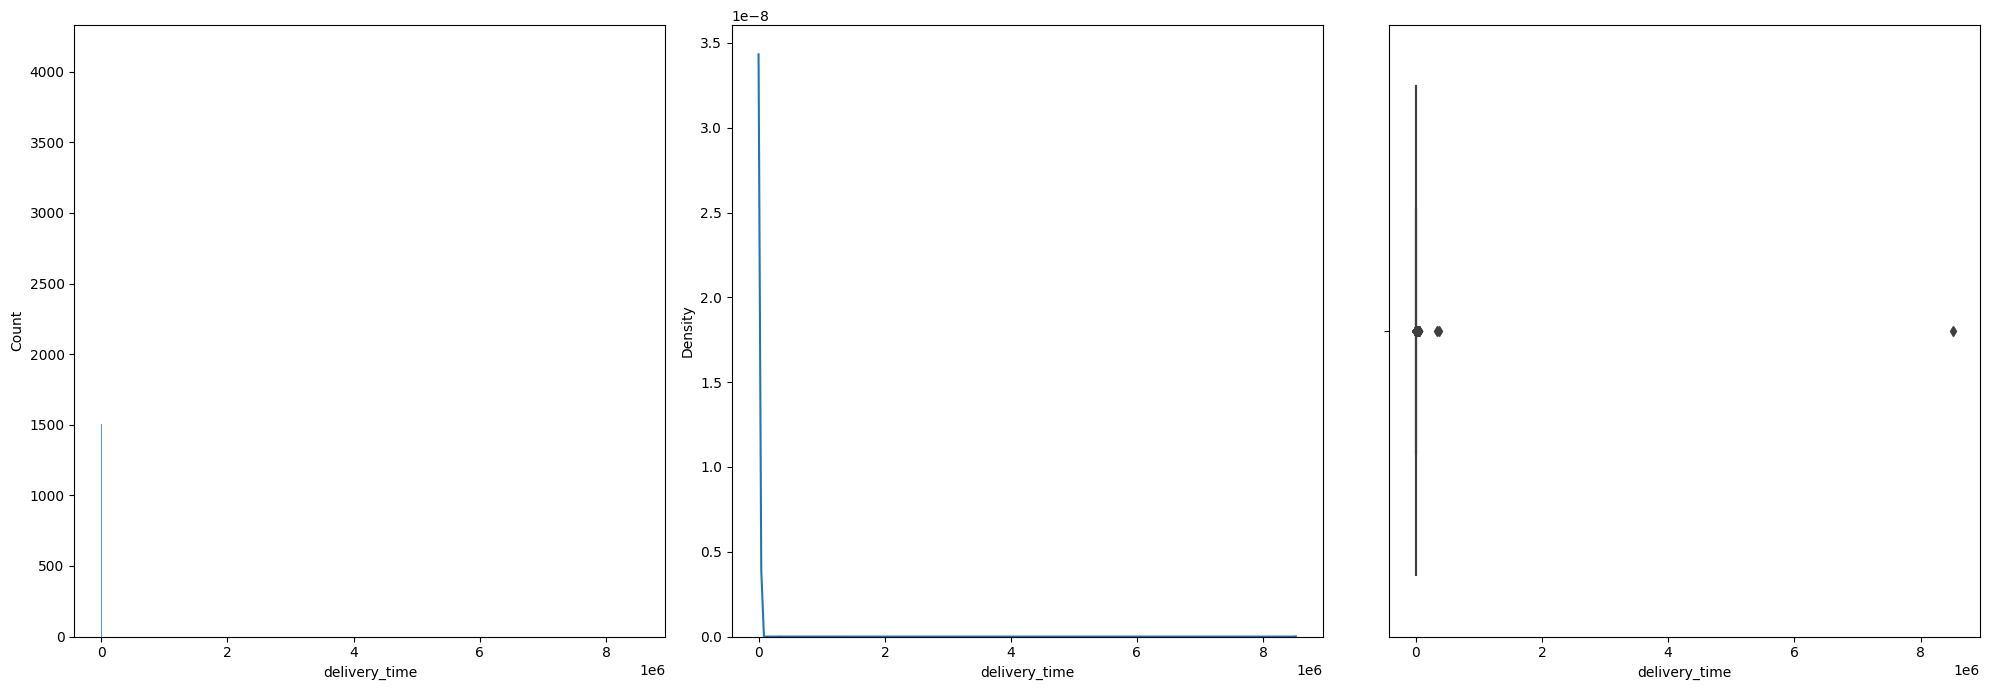

In [ ]:
for col in num_columns:
  plot_num_variables(work_df, col)

#### Outliers
Outliers in the dataset impact the predictions. Some of the ways the outliers can be removed are: 
a. Z-Score
b. IQR (Inter Quartile Range)
c. MAD (Median Absolute Deviation)

#### Graphical Analysis of Categorical Variables

In [22]:
# Create helper method to display bar plots
def plot_cat_variables(data, var: str):
  title = str(" Distribution of " + var + " ")
  fig, ax = plt.subplots(figsize=(10, 5))
  sns.countplot(data, x=var, ax=ax)
  ax.set_title(title)
  print()
  plt.show()

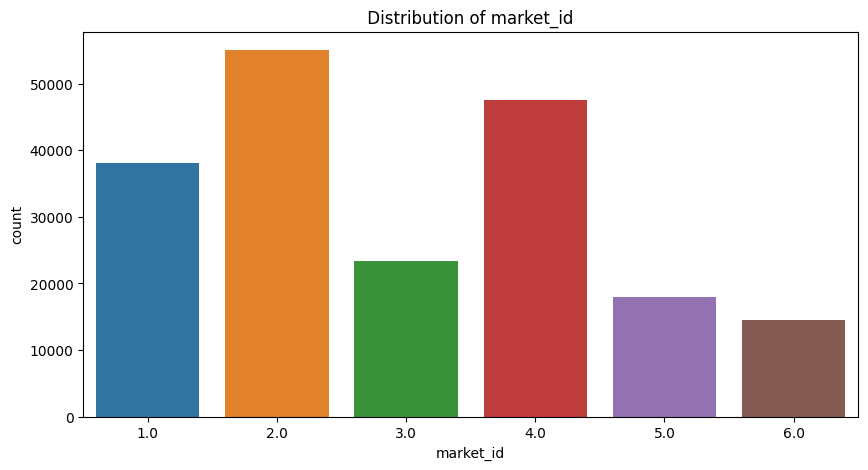

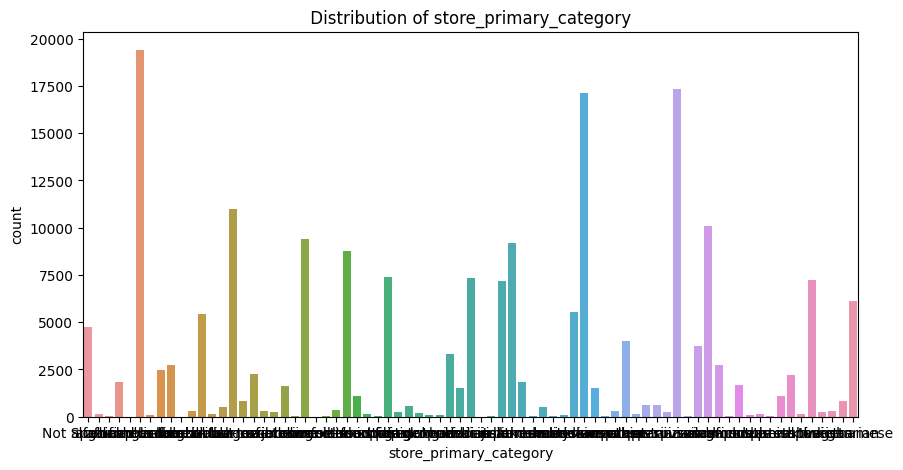

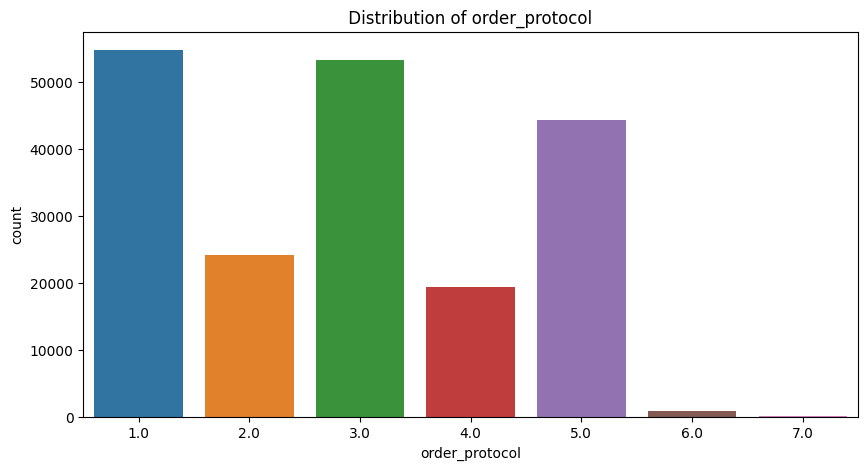

In [23]:
cat_columns = work_df.select_dtypes('category')
for col in cat_columns:
  plot_cat_variables(work_df, col)

In [32]:
work_df['time_at'] = work_df['created_at']
orders_per_hour = work_df[['time_at']].value_counts().to_frame().reset_index()
orders_per_hour = orders_per_hour.rename(columns={0:'count'})
orders_per_hour = orders_per_hour.sort_values('time_at')
orders_per_hour = orders_per_hour.reset_index(drop=True)

fig = px.scatter(orders_per_hour, x='time_at', y='count', hover_data=['time_at', 'count'], color='count')
fig.update_layout(title='Orders Per Hour', 
                  xaxis=dict(tickmode='linear', tick0=0, dtick=1), title_x=0.5)
fig.show()

In [ ]:
# Max Orders and the time of the Order
max_cnt = orders_per_hour['count'].max()
max_time = orders_per_hour.loc[orders_per_hour['count']==max_cnt, 'time_at'].iloc[0]
print(f"The maximum order quantity is given at time {max_time} with {max_cnt} orders")

The maximum order quantity is given at time 2 with 36976 orders


In [ ]:
# Average number of items per order
print(f"Average # of items per order is: {round(work_df['total_items'].mean(),2)}")

Average # of items per order is: 3.2


In [ ]:
# Average spend by people per order
print(f"Average spend by people {round(work_df['subtotal'].mean(),2)} per order")

Average spend by people 2682.33 per order


## Bivariate Analysis

In [ ]:
# Top 10 stores with highest subtotal/money
store_wise_money = work_df.groupby('store_primary_category')['subtotal'].sum().to_frame().reset_index()
store_wise_money = store_wise_money.sort_values('subtotal', ascending=False)
store_wise_money = store_wise_money.head(10)
store_wise_money = store_wise_money.reset_index(drop=True)
store_wise_money

,store_primary_category,subtotal
0,pizza,52092237
1,american,51572367
2,mexican,39251042
3,japanese,30905690
4,chinese,27021933
5,italian,26874120
6,burger,24277803
7,thai,22455499
8,dessert,21381785
9,indian,21264973


In [ ]:
fig = px.bar(store_wise_money, x='subtotal', y='store_primary_category', hover_data=['subtotal', 'store_primary_category'], color='subtotal', text_auto=True)
fig.update_layout(title="Top 10 Most Popular Stores", 
                  width=800, title_x=0.5)
fig.show()

In [14]:
# Number of on shift Partners
num_of_partners = work_df.groupby('time_at')['total_onshift_partners'].sum().to_frame()
fig = px.scatter(num_of_partners, y='total_onshift_partners', hover_data=['total_onshift_partners'], color='total_onshift_partners')

fig.update_layout(title='# of on shift Partners', title_x=0.5)
fig.update_layout(xaxis=dict(tickmode='linear', tick0=0, dtick=1))

fig.show()

In [16]:
# Number of Busy Partners
num_of_busy_partners = work_df.groupby('time_at')['total_busy_partners'].sum().to_frame()
fig = px.scatter(num_of_busy_partners, y='total_busy_partners', hover_data=['total_busy_partners'], color='total_busy_partners')

fig.update_layout(title='# of Busy Partners', title_x=0.5)
fig.update_layout(xaxis=dict(tickmode='linear', tick0=0, dtick=1))

fig.show()

In [17]:
# Number of Pending Orders
pending_orders = work_df.groupby('time_at')['total_outstanding_orders'].sum().to_frame()
fig = px.scatter(pending_orders, y='total_outstanding_orders', hover_data=['total_outstanding_orders'], color='total_outstanding_orders')

fig.update_layout(title='# of Pending Orders', title_x=0.5)
fig.update_layout(xaxis=dict(tickmode='linear', tick0=0, dtick=1))

fig.show()

### Multivariate Analysis

In [20]:
fig = px.line(num_of_partners, y='total_onshift_partners', title='Availability Vs Time', hover_data=['total_onshift_partners'], color_discrete_sequence=['red'])
fig.add_trace(px.line(num_of_busy_partners, y='total_busy_partners', color_discrete_sequence=['green']).data[0])
fig.add_trace(px.line(pending_orders, y='total_outstanding_orders', color_discrete_sequence=['blue']).data[0])
fig.update_layout(title_x=0.5)
fig.update_yaxes(title_text='Number of Partners')
fig.show()

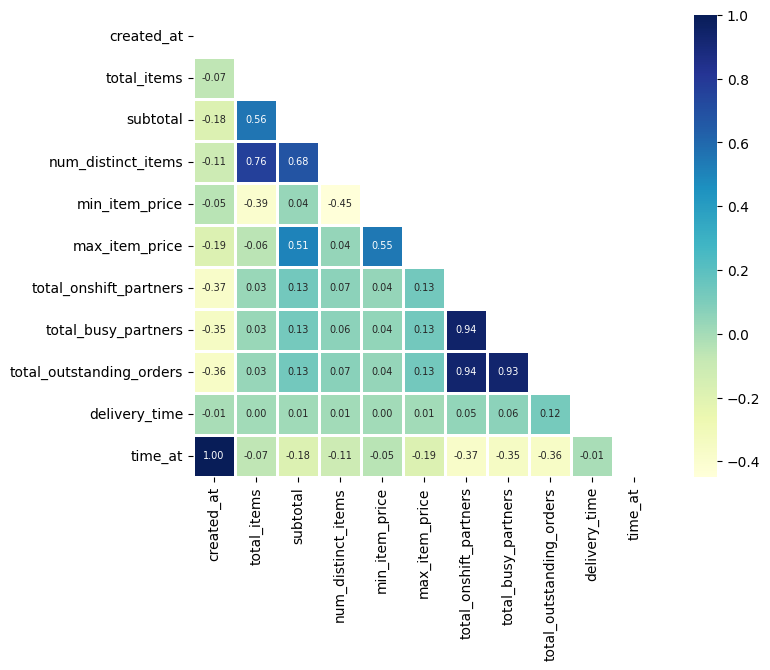

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
corr_matrix = work_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

ax = sns.heatmap(corr_matrix, 
                 square=True,
                 linewidth=1,
                 annot=True,
                 linecolor='white',
                 cmap='YlGnBu',
                 annot_kws={'size':7},
                 fmt='.2f',
                 mask=mask)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.show()

In [34]:
# Drop the NA values in 'actual delivery time'
work_df = work_df.dropna(subset=['actual_delivery_time'])
work_df = work_df.reset_index(drop=True)

In [78]:
work_df[work_df["delivery_time"]>15000].shape

(52, 15)

In [79]:
work_df=work_df[work_df["delivery_time"]<15000]

In [99]:
work_df = work_df.dropna()

In [101]:
work_df.isna().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
delivery_time               0
time_at                     0
dtype: int64

In [110]:
work_df["delivery_time"]=(pd.to_datetime(work_df["actual_delivery_time"])-pd.to_datetime(work_df["created_at"])).dt.total_seconds()

In [111]:
work_df["created_at"]=pd.to_datetime(work_df["created_at"]).dt.hour

In [122]:
work_df=work_df.drop(["actual_delivery_time"],axis=1)

In [41]:
# Impute categorical variables
category_cols = ["market_id","store_primary_category","order_protocol"]

from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy = "most_frequent")

data_impute_cat = si.fit_transform(work_df[category_cols])

data_impute_cat = pd.DataFrame(data_impute_cat, columns = category_cols)
data_impute_cat.head()

,market_id,store_primary_category,order_protocol
0,1.0,american,1.0
1,2.0,mexican,2.0
2,3.0,Not Specified,1.0
3,3.0,Not Specified,1.0
4,3.0,Not Specified,1.0


In [42]:
data_impute_cat.isnull().sum()

market_id                 0
store_primary_category    0
order_protocol            0
dtype: int64

In [46]:
# Imputation of numerical variables
#====================================================================================================
numerical_cols = ["total_items","subtotal","num_distinct_items","min_item_price","max_item_price", 
                  "total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]


from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy = "median")

data_impute_num = si.fit_transform(work_df[numerical_cols])

data_impute_num = pd.DataFrame(data_impute_num, columns = numerical_cols)
data_impute_num.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0
2,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0
4,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0


In [47]:
data_impute_num.isnull().sum()

total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

## Data Segregation for Model Training

In [123]:
X=work_df.iloc[:,:-1]
y=work_df.iloc[:,-1:].values.ravel()

In [124]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [125]:
X["store_primary_category"]=le.fit_transform(X["store_primary_category"])

In [126]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [127]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
knnr=KNeighborsRegressor(n_neighbors=5)
lir=LinearRegression()
rfr=RandomForestRegressor(n_estimators=100)
dtr=DecisionTreeRegressor(max_depth=5)

In [128]:
models={"knnr":knnr,"lir":lir,"rfr":rfr,"dtr":dtr}

In [129]:
results=pd.DataFrame(y_test,columns=["y_test"])

In [130]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    results[model_name]=y_pred

In [131]:
results

,y_test,knnr,lir,rfr,dtr
0,3,3.0,-1.714381,3.00,2.362215
1,2,2.0,8.934778,3.03,7.511957
2,2,1.8,10.569626,2.39,6.595417
3,3,3.6,3.656445,3.00,2.362215
4,3,2.0,7.604557,8.11,6.581593
...,...,...,...,...,...
44928,4,4.0,10.858675,3.95,10.268411
44929,19,18.8,9.868338,18.33,11.921528
44930,2,1.8,2.176622,1.95,2.665037
44931,21,21.0,10.395266,20.97,11.921528


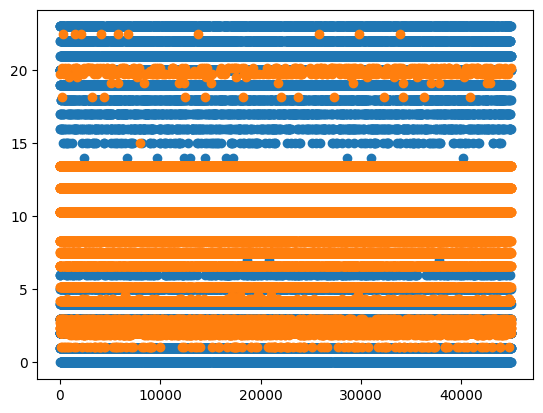

In [132]:
plt.scatter(np.arange(len(y_test)),results["y_test"])
plt.scatter(np.arange(len(y_test)),results["dtr"])
plt.show()

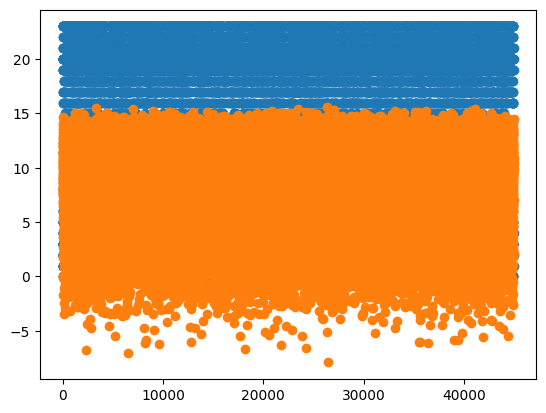

In [135]:
plt.scatter(np.arange(len(y_test)),results["y_test"])
plt.scatter(np.arange(len(y_test)),results["lir"])
plt.show()

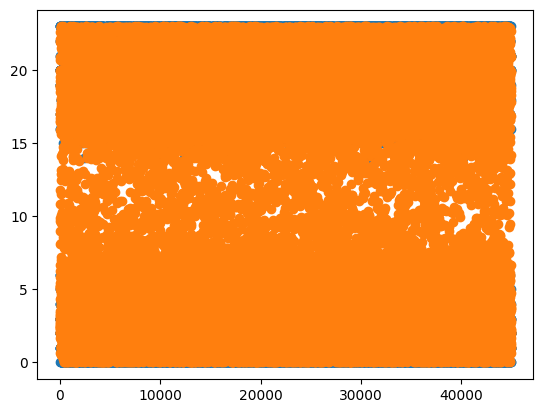

In [136]:
plt.scatter(np.arange(len(y_test)),results["y_test"])
plt.scatter(np.arange(len(y_test)),results["rfr"])
plt.show()

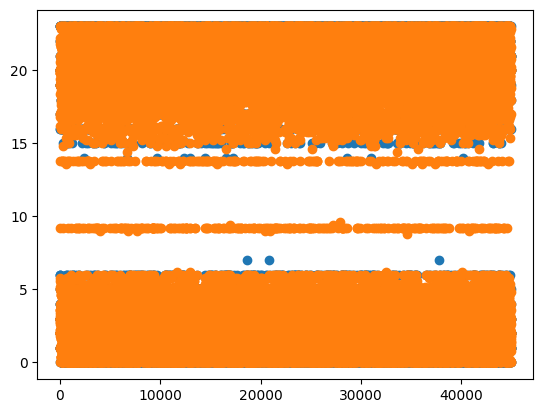

In [137]:
plt.scatter(np.arange(len(y_test)),results["y_test"])
plt.scatter(np.arange(len(y_test)),results["knnr"])
plt.show()

In [138]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def metrics_evals(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {"MSE":mse, 
            "RMSE":rmse, 
            "MAE":mae, 
            "R2":r2}

In [139]:
lr = LinearRegression()

# Fit model
lr.fit(X_train, y_train)

# Train Predictions
y_pred_train_lr = lr.predict(X_train)

# Test Predictions
y_pred_test_lr = lr.predict(X_test)

In [140]:
# Metrics Train
metrics_evals(y_train,y_pred_train_lr)

{'MSE': 62.34371623688247,
 'RMSE': 7.895803710635319,
 'MAE': 6.9691431422917,
 'R2': 0.17263344387004953}

In [141]:
# Metrics Test
metrics_evals(y_test, y_pred_test_lr)

{'MSE': 62.32591207416301,
 'RMSE': 7.894676185516604,
 'MAE': 6.972285092583223,
 'R2': 0.1732183495571591}

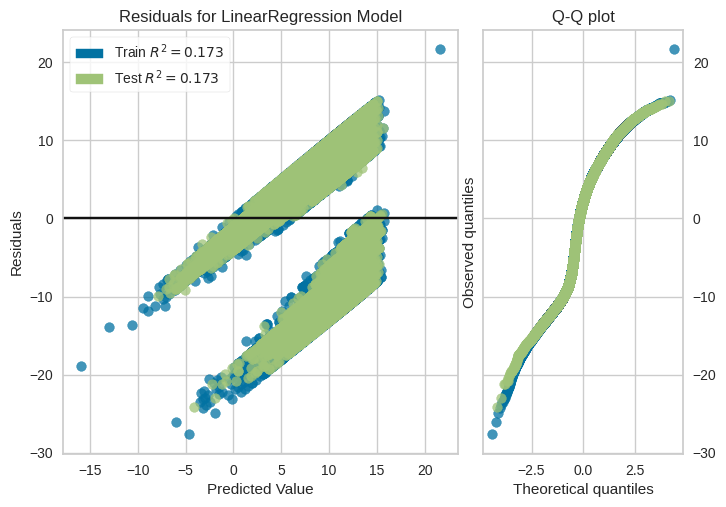

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [143]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lr, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

### Random Forest

In [144]:
rf = RandomForestRegressor(random_state=123)

rf.fit(X_train, y_train)

# Train Predictions
y_pred_train_rf = rf.predict(X_train)

# Test Predictions
y_pred_test_rf = rf.predict(X_test)

In [145]:
# Metrics Train
metrics_evals(y_train,y_pred_train_rf)

{'MSE': 1.2444110431086284,
 'RMSE': 1.115531731107918,
 'MAE': 0.5360161425529865,
 'R2': 0.9834853592103038}

In [147]:
# Metrics Test
metrics_evals(y_test,y_pred_test_rf)

{'MSE': 8.976374375180825,
 'RMSE': 2.996059808345091,
 'MAE': 1.456166292034807,
 'R2': 0.8809242997988731}

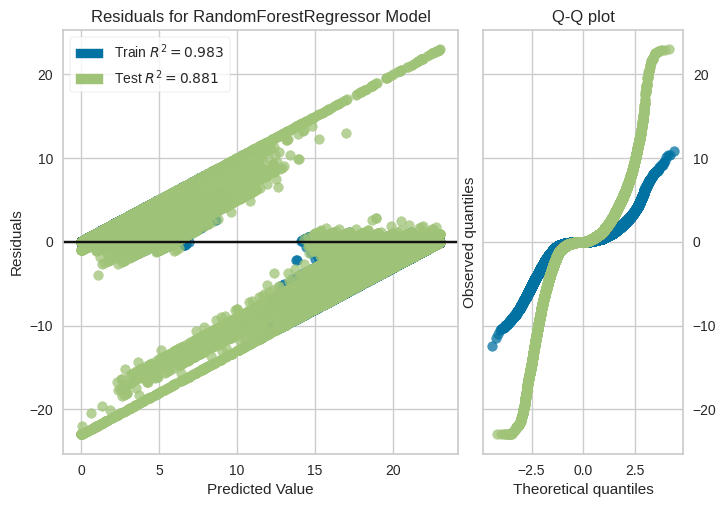

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [148]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(rf, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [155]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [153]:
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model

In [154]:
tf.random.set_seed(123)

inputs = Input(shape=(X_train.shape[1],))

x = Dense(units=64, activation="relu")(inputs)
x = Dropout(rate=0.20)(x)

x = Dense(units=64, activation="relu")(x)
x = Dropout(rate=0.20)(x)

x = Dense(units=64, activation="relu")(x)
x = Dropout(rate=0.20)(x)

output = Dense(units= 1)(x) 

model_dense = Model(inputs=inputs, outputs=output, name="model_dense")

model_dense.compile(optimizer = tf.keras.optimizers.Adam(), 
                    loss = "mean_squared_error", 
                    metrics = ["mae"])

In [157]:
history = model_dense.fit(X_train, 
                          y_train, 
                          validation_data = (X_test, y_test), 
                          batch_size = 256, 
                          epochs = 100, 
                          verbose = 1, 
                          callbacks = [create_model_checkpoint(model_name = model_dense.name)])

Epoch 1/100
518/527 [============================>.] - ETA: 0s - loss: 833980307865600.0000 - mae: 11951359.0000

527/527 [==============================] - 6s 7ms/step - loss: 820514981412864.0000 - mae: 11766699.0000 - val_loss: 1507502464.0000 - val_mae: 38826.5664
Epoch 2/100
516/527 [============================>.] - ETA: 0s - loss: 2891873779712.0000 - mae: 326144.6875

527/527 [==============================] - 3s 5ms/step - loss: 2891851235328.0000 - mae: 324160.2812 - val_loss: 8649408.0000 - val_mae: 2940.9734
Epoch 3/100
527/527 [==============================] - 2s 4ms/step - loss: 1541292032000.0000 - mae: 172386.6094 - val_loss: 45675524.0000 - val_mae: 6758.3618
Epoch 4/100
527/527 [==============================] - 2s 4ms/step - loss: 879302541312.0000 - mae: 107298.5469 - val_loss: 39554356.0000 - val_mae: 6289.2202
Epoch 5/100
527/527 [==============================] - 2s 4ms/step - loss: 718731542528.0000 - mae: 82226.7656 - val_loss: 105745992.0000 - val_mae: 10283.2891
Epoch 6/100
527/527 [==============================] - 2s 3ms/step - loss: 424784822272.0000 - mae: 57507.1484 - val_loss: 13190933.0000 - val_mae: 3631.9214
Epoch 7/100
522/527 [============================>.] - ETA: 0s - loss: 320983793664.0000 - mae: 47648.3867

527/527 [==============================] - 5s 10ms/step - loss: 318280761344.0000 - mae: 47429.9297 - val_loss: 54781.0586 - val_mae: 233.8923
Epoch 8/100
527/527 [==============================] - 4s 7ms/step - loss: 207252422656.0000 - mae: 35971.0391 - val_loss: 60333000.0000 - val_mae: 7767.4253
Epoch 9/100
527/527 [==============================] - 4s 7ms/step - loss: 171437506560.0000 - mae: 29642.3984 - val_loss: 329370.3125 - val_mae: 573.8422
Epoch 10/100
527/527 [==============================] - 2s 4ms/step - loss: 155935014912.0000 - mae: 25794.8301 - val_loss: 313510.7500 - val_mae: 559.8530
Epoch 11/100
527/527 [==============================] - 2s 4ms/step - loss: 123309146112.0000 - mae: 23539.0273 - val_loss: 12704003.0000 - val_mae: 3564.2568
Epoch 12/100
527/527 [==============================] - 2s 3ms/step - loss: 119666049024.0000 - mae: 21043.9277 - val_loss: 8040448.0000 - val_mae: 2835.5547
Epoch 13/100
527/527 [==============================] - 2s 3ms/step - l

527/527 [==============================] - 3s 6ms/step - loss: 57522888704.0000 - mae: 14063.5791 - val_loss: 147.7861 - val_mae: 8.5094
Epoch 15/100
527/527 [==============================] - 2s 5ms/step - loss: 43883417600.0000 - mae: 9839.5527 - val_loss: 147.7994 - val_mae: 8.5101
Epoch 16/100
520/527 [============================>.] - ETA: 0s - loss: 20867909632.0000 - mae: 7398.7905

527/527 [==============================] - 4s 8ms/step - loss: 20722823168.0000 - mae: 7470.3491 - val_loss: 147.7860 - val_mae: 8.5094
Epoch 17/100
527/527 [==============================] - 2s 3ms/step - loss: 13413486592.0000 - mae: 4889.5322 - val_loss: 147.7876 - val_mae: 8.5094
Epoch 18/100
515/527 [============================>.] - ETA: 0s - loss: 11188830208.0000 - mae: 4543.5005

527/527 [==============================] - 3s 5ms/step - loss: 11106200576.0000 - mae: 4539.8145 - val_loss: 147.7624 - val_mae: 8.5082
Epoch 19/100
527/527 [==============================] - 2s 4ms/step - loss: 16440572928.0000 - mae: 6455.6938 - val_loss: 147.7775 - val_mae: 8.5089
Epoch 20/100
527/527 [==============================] - 2s 4ms/step - loss: 7450995200.0000 - mae: 2671.2332 - val_loss: 147.7843 - val_mae: 8.5093
Epoch 21/100
513/527 [============================>.] - ETA: 0s - loss: 6915109888.0000 - mae: 2559.8862

527/527 [==============================] - 3s 5ms/step - loss: 6744422400.0000 - mae: 2520.7197 - val_loss: 147.7601 - val_mae: 8.5080
Epoch 22/100
527/527 [==============================] - 2s 3ms/step - loss: 6112461312.0000 - mae: 2256.4106 - val_loss: 147.7745 - val_mae: 8.5088
Epoch 23/100
522/527 [============================>.] - ETA: 0s - loss: 13430223872.0000 - mae: 1638.6490

527/527 [==============================] - 3s 5ms/step - loss: 13322982400.0000 - mae: 1635.2024 - val_loss: 147.5337 - val_mae: 8.4965
Epoch 24/100
527/527 [==============================] - 2s 4ms/step - loss: 10218979328.0000 - mae: 1409.5443 - val_loss: 147.7540 - val_mae: 8.5077
Epoch 25/100
527/527 [==============================] - 2s 5ms/step - loss: 834924992.0000 - mae: 513.9307 - val_loss: 147.6790 - val_mae: 8.5039
Epoch 26/100
527/527 [==============================] - 2s 3ms/step - loss: 384181088.0000 - mae: 262.9118 - val_loss: 147.5879 - val_mae: 8.4992
Epoch 27/100
511/527 [============================>.] - ETA: 0s - loss: 748047488.0000 - mae: 330.5223

527/527 [==============================] - 3s 5ms/step - loss: 726052480.0000 - mae: 323.0530 - val_loss: 147.5309 - val_mae: 8.4963
Epoch 28/100
515/527 [============================>.] - ETA: 0s - loss: 1117342976.0000 - mae: 319.6202

527/527 [==============================] - 3s 6ms/step - loss: 1092816512.0000 - mae: 312.9080 - val_loss: 147.4389 - val_mae: 8.4916
Epoch 29/100
527/527 [==============================] - 2s 4ms/step - loss: 206178784.0000 - mae: 102.5359 - val_loss: 147.4665 - val_mae: 8.4930
Epoch 30/100
520/527 [============================>.] - ETA: 0s - loss: 1452939648.0000 - mae: 210.4019

527/527 [==============================] - 3s 6ms/step - loss: 1434843648.0000 - mae: 208.0518 - val_loss: 147.1890 - val_mae: 8.4788
Epoch 31/100
525/527 [============================>.] - ETA: 0s - loss: 2119172864.0000 - mae: 330.9592

527/527 [==============================] - 3s 5ms/step - loss: 2112900224.0000 - mae: 330.0045 - val_loss: 146.9073 - val_mae: 8.4643
Epoch 32/100
527/527 [==============================] - 2s 3ms/step - loss: 314065024.0000 - mae: 122.6938 - val_loss: 147.0984 - val_mae: 8.4742
Epoch 33/100
527/527 [==============================] - 2s 4ms/step - loss: 157609984.0000 - mae: 101.1497 - val_loss: 146.9756 - val_mae: 8.4679
Epoch 34/100
527/527 [==============================] - 2s 4ms/step - loss: 70087016.0000 - mae: 37.2466 - val_loss: 147.0198 - val_mae: 8.4701
Epoch 35/100
510/527 [============================>.] - ETA: 0s - loss: 369299840.0000 - mae: 70.6237

527/527 [==============================] - 3s 6ms/step - loss: 357686528.0000 - mae: 68.6606 - val_loss: 146.6709 - val_mae: 8.4522
Epoch 36/100
515/527 [============================>.] - ETA: 0s - loss: 676374080.0000 - mae: 97.3041 

527/527 [==============================] - 3s 5ms/step - loss: 661526848.0000 - mae: 95.3491 - val_loss: 146.1828 - val_mae: 8.4270
Epoch 37/100
518/527 [============================>.] - ETA: 0s - loss: 744076736.0000 - mae: 143.1338

527/527 [==============================] - 3s 5ms/step - loss: 731982656.0000 - mae: 140.9504 - val_loss: 146.0881 - val_mae: 8.4221
Epoch 38/100
522/527 [============================>.] - ETA: 0s - loss: 252176928.0000 - mae: 68.5447

527/527 [==============================] - 3s 5ms/step - loss: 249993744.0000 - mae: 68.0225 - val_loss: 145.8593 - val_mae: 8.4103
Epoch 39/100
522/527 [============================>.] - ETA: 0s - loss: 1088628224.0000 - mae: 174.9249

527/527 [==============================] - 4s 7ms/step - loss: 1079203584.0000 - mae: 173.4809 - val_loss: 145.8127 - val_mae: 8.4079
Epoch 40/100
527/527 [==============================] - 2s 4ms/step - loss: 428011104.0000 - mae: 98.1939 - val_loss: 145.8904 - val_mae: 8.4119
Epoch 41/100
527/527 [==============================] - 2s 4ms/step - loss: 69795760.0000 - mae: 39.5186 - val_loss: 146.0224 - val_mae: 8.4187
Epoch 42/100
527/527 [==============================] - 2s 4ms/step - loss: 9235987.0000 - mae: 21.8911 - val_loss: 145.9757 - val_mae: 8.4163
Epoch 43/100
525/527 [============================>.] - ETA: 0s - loss: 21247544.0000 - mae: 20.9505

527/527 [==============================] - 3s 5ms/step - loss: 21184652.0000 - mae: 20.9167 - val_loss: 145.7729 - val_mae: 8.4058
Epoch 44/100
516/527 [============================>.] - ETA: 0s - loss: 895974976.0000 - mae: 133.4657

527/527 [==============================] - 3s 6ms/step - loss: 878008832.0000 - mae: 130.9610 - val_loss: 145.3911 - val_mae: 8.3860
Epoch 45/100
527/527 [==============================] - 2s 4ms/step - loss: 185721616.0000 - mae: 45.7783 - val_loss: 145.5667 - val_mae: 8.3951
Epoch 46/100
527/527 [==============================] - 2s 4ms/step - loss: 7781249.5000 - mae: 19.1103 - val_loss: 145.4896 - val_mae: 8.3911
Epoch 47/100
527/527 [==============================] - 2s 4ms/step - loss: 7368333312.0000 - mae: 263.6037 - val_loss: 145.8180 - val_mae: 8.4081
Epoch 48/100
527/527 [==============================] - 2s 4ms/step - loss: 145.3077 - mae: 8.3796 - val_loss: 145.7917 - val_mae: 8.4068
Epoch 49/100
527/527 [==============================] - 2s 4ms/step - loss: 680904.2500 - mae: 11.5480 - val_loss: 145.7465 - val_mae: 8.4044
Epoch 50/100
514/527 [============================>.] - ETA: 0s - loss: 1813406208.0000 - mae: 127.1796

527/527 [==============================] - 3s 6ms/step - loss: 1770155904.0000 - mae: 124.3534 - val_loss: 145.3155 - val_mae: 8.3821
Epoch 51/100
526/527 [============================>.] - ETA: 0s - loss: 1888994.2500 - mae: 12.0992

527/527 [==============================] - 3s 5ms/step - loss: 1886990.5000 - mae: 12.0950 - val_loss: 145.2963 - val_mae: 8.3811
Epoch 52/100
527/527 [==============================] - 2s 4ms/step - loss: 16456997.0000 - mae: 19.4030 - val_loss: 145.3097 - val_mae: 8.3818
Epoch 53/100
527/527 [==============================] - 2s 3ms/step - loss: 32751172.0000 - mae: 23.9415 - val_loss: 145.3651 - val_mae: 8.3847
Epoch 54/100
525/527 [============================>.] - ETA: 0s - loss: 62610604.0000 - mae: 40.7363

527/527 [==============================] - 4s 8ms/step - loss: 62425280.0000 - mae: 40.6428 - val_loss: 145.2156 - val_mae: 8.3769
Epoch 55/100
524/527 [============================>.] - ETA: 0s - loss: 144.6947 - mae: 8.3476

527/527 [==============================] - 3s 5ms/step - loss: 144.7033 - mae: 8.3481 - val_loss: 145.1509 - val_mae: 8.3735
Epoch 56/100
527/527 [==============================] - ETA: 0s - loss: 87470.1406 - mae: 9.1477

527/527 [==============================] - 3s 6ms/step - loss: 87470.1406 - mae: 9.1477 - val_loss: 145.0435 - val_mae: 8.3679
Epoch 57/100
515/527 [============================>.] - ETA: 0s - loss: 144.4107 - mae: 8.3333

527/527 [==============================] - 4s 7ms/step - loss: 144.4758 - mae: 8.3362 - val_loss: 144.8892 - val_mae: 8.3599
Epoch 58/100
521/527 [============================>.] - ETA: 0s - loss: 755567.3125 - mae: 11.2282

527/527 [==============================] - 3s 6ms/step - loss: 747592.7500 - mae: 11.1994 - val_loss: 144.6141 - val_mae: 8.3455
Epoch 59/100
515/527 [============================>.] - ETA: 0s - loss: 143.9674 - mae: 8.3096

527/527 [==============================] - 3s 5ms/step - loss: 143.9985 - mae: 8.3112 - val_loss: 144.3562 - val_mae: 8.3320
Epoch 60/100
526/527 [============================>.] - ETA: 0s - loss: 143.7130 - mae: 8.2961

527/527 [==============================] - 3s 5ms/step - loss: 143.7054 - mae: 8.2958 - val_loss: 144.0223 - val_mae: 8.3146
Epoch 61/100
518/527 [============================>.] - ETA: 0s - loss: 143.4070 - mae: 8.2801

527/527 [==============================] - 3s 5ms/step - loss: 143.3259 - mae: 8.2758 - val_loss: 143.5901 - val_mae: 8.2918
Epoch 62/100
523/527 [============================>.] - ETA: 0s - loss: 3955532.0000 - mae: 13.6828

527/527 [==============================] - 3s 6ms/step - loss: 3928800.7500 - mae: 13.6460 - val_loss: 142.7359 - val_mae: 8.2467
Epoch 63/100
527/527 [==============================] - 2s 4ms/step - loss: 33820116.0000 - mae: 24.0561 - val_loss: 142.7493 - val_mae: 8.2475
Epoch 64/100
527/527 [==============================] - 2s 3ms/step - loss: 2666894080.0000 - mae: 148.8696 - val_loss: 142.9777 - val_mae: 8.2595
Epoch 65/100
527/527 [==============================] - 2s 3ms/step - loss: 142.4841 - mae: 8.2313 - val_loss: 142.9532 - val_mae: 8.2582
Epoch 66/100
527/527 [==============================] - 2s 3ms/step - loss: 112735416.0000 - mae: 44.3084 - val_loss: 142.8175 - val_mae: 8.2511
Epoch 67/100
527/527 [==============================] - 2s 4ms/step - loss: 218.0820 - mae: 8.2452 - val_loss: 142.7600 - val_mae: 8.2480
Epoch 68/100
512/527 [============================>.] - ETA: 0s - loss: 142.2885 - mae: 8.2208

527/527 [==============================] - 3s 6ms/step - loss: 142.2380 - mae: 8.2182 - val_loss: 142.6856 - val_mae: 8.2441
Epoch 69/100
518/527 [============================>.] - ETA: 0s - loss: 142.1282 - mae: 8.2124

527/527 [==============================] - 3s 5ms/step - loss: 142.1532 - mae: 8.2137 - val_loss: 142.5888 - val_mae: 8.2390
Epoch 70/100
515/527 [============================>.] - ETA: 0s - loss: 12564074.0000 - mae: 19.3676

527/527 [==============================] - 3s 5ms/step - loss: 12288278.0000 - mae: 19.1248 - val_loss: 142.5883 - val_mae: 8.2389
Epoch 71/100
523/527 [============================>.] - ETA: 0s - loss: 9582264.0000 - mae: 16.7183

527/527 [==============================] - 3s 5ms/step - loss: 9517505.0000 - mae: 16.6622 - val_loss: 142.2635 - val_mae: 8.2217
Epoch 72/100
527/527 [==============================] - 2s 4ms/step - loss: 26600330.0000 - mae: 22.2499 - val_loss: 142.3500 - val_mae: 8.2263
Epoch 73/100
527/527 [==============================] - 2s 3ms/step - loss: 1131459712.0000 - mae: 100.4862 - val_loss: 142.7529 - val_mae: 8.2476
Epoch 74/100
527/527 [==============================] - 2s 3ms/step - loss: 142.2369 - mae: 8.2182 - val_loss: 142.6912 - val_mae: 8.2444
Epoch 75/100
527/527 [==============================] - 2s 3ms/step - loss: 320793536.0000 - mae: 63.1613 - val_loss: 142.3462 - val_mae: 8.2261
Epoch 76/100
527/527 [==============================] - 2s 3ms/step - loss: 141.8233 - mae: 8.1961 - val_loss: 142.2671 - val_mae: 8.2219
Epoch 77/100
521/527 [============================>.] - ETA: 0s - loss: 141.7405 - mae: 8.1918

527/527 [==============================] - 3s 5ms/step - loss: 141.7332 - mae: 8.1913 - val_loss: 142.1642 - val_mae: 8.2164
Epoch 78/100
519/527 [============================>.] - ETA: 0s - loss: 823999680.0000 - mae: 112.9637

527/527 [==============================] - 3s 6ms/step - loss: 812171392.0000 - mae: 111.4620 - val_loss: 141.9786 - val_mae: 8.2065
Epoch 79/100
520/527 [============================>.] - ETA: 0s - loss: 141.5315 - mae: 8.1796

527/527 [==============================] - 3s 5ms/step - loss: 141.4645 - mae: 8.1770 - val_loss: 141.9155 - val_mae: 8.2032
Epoch 80/100
524/527 [============================>.] - ETA: 0s - loss: 6161412.5000 - mae: 15.3436

527/527 [==============================] - 3s 6ms/step - loss: 6131474.5000 - mae: 15.3105 - val_loss: 141.9049 - val_mae: 8.2026
Epoch 81/100
522/527 [============================>.] - ETA: 0s - loss: 141.3241 - mae: 8.1700

527/527 [==============================] - 3s 5ms/step - loss: 141.3708 - mae: 8.1719 - val_loss: 141.7990 - val_mae: 8.1970
Epoch 82/100
525/527 [============================>.] - ETA: 0s - loss: 8593283.0000 - mae: 16.1587

527/527 [==============================] - 3s 6ms/step - loss: 8567847.0000 - mae: 16.1348 - val_loss: 141.5314 - val_mae: 8.1827
Epoch 83/100
512/527 [============================>.] - ETA: 0s - loss: 140.9768 - mae: 8.1509

527/527 [==============================] - 3s 5ms/step - loss: 140.9671 - mae: 8.1503 - val_loss: 141.3592 - val_mae: 8.1735
Epoch 84/100
514/527 [============================>.] - ETA: 0s - loss: 4629807.0000 - mae: 14.0698

527/527 [==============================] - 3s 5ms/step - loss: 4519389.5000 - mae: 13.9254 - val_loss: 140.9912 - val_mae: 8.1537
Epoch 85/100
522/527 [============================>.] - ETA: 0s - loss: 140.3539 - mae: 8.1173

527/527 [==============================] - 3s 5ms/step - loss: 140.3792 - mae: 8.1187 - val_loss: 140.7148 - val_mae: 8.1389
Epoch 86/100
509/527 [===========================>..] - ETA: 0s - loss: 140.1904 - mae: 8.1076

527/527 [==============================] - 4s 7ms/step - loss: 140.0650 - mae: 8.1017 - val_loss: 140.3568 - val_mae: 8.1196
Epoch 87/100
516/527 [============================>.] - ETA: 0s - loss: 139.7960 - mae: 8.0858

527/527 [==============================] - 3s 5ms/step - loss: 139.6584 - mae: 8.0797 - val_loss: 139.8943 - val_mae: 8.0946
Epoch 88/100
525/527 [============================>.] - ETA: 0s - loss: 678184512.0000 - mae: 79.0828

527/527 [==============================] - 3s 5ms/step - loss: 676177088.0000 - mae: 78.8742 - val_loss: 138.8534 - val_mae: 8.0381
Epoch 89/100
518/527 [============================>.] - ETA: 0s - loss: 138.3091 - mae: 8.0063

527/527 [==============================] - 3s 5ms/step - loss: 138.3461 - mae: 8.0081 - val_loss: 138.7847 - val_mae: 8.0343
Epoch 90/100
508/527 [===========================>..] - ETA: 0s - loss: 354781504.0000 - mae: 60.2223

527/527 [==============================] - 3s 6ms/step - loss: 342277184.0000 - mae: 58.3840 - val_loss: 138.3456 - val_mae: 8.0103
Epoch 91/100
517/527 [============================>.] - ETA: 0s - loss: 618433216.0000 - mae: 76.4107

527/527 [==============================] - 3s 5ms/step - loss: 607206784.0000 - mae: 75.1715 - val_loss: 137.9055 - val_mae: 7.9862
Epoch 92/100
520/527 [============================>.] - ETA: 0s - loss: 14141884.0000 - mae: 26.0070

527/527 [==============================] - 3s 5ms/step - loss: 13965739.0000 - mae: 25.7804 - val_loss: 137.8739 - val_mae: 7.9844
Epoch 93/100
521/527 [============================>.] - ETA: 0s - loss: 137.4835 - mae: 7.9602

527/527 [==============================] - 3s 6ms/step - loss: 137.3657 - mae: 7.9542 - val_loss: 137.7931 - val_mae: 7.9800
Epoch 94/100
516/527 [============================>.] - ETA: 0s - loss: 137.3343 - mae: 7.9527

527/527 [==============================] - 3s 6ms/step - loss: 137.2737 - mae: 7.9491 - val_loss: 137.6883 - val_mae: 7.9742
Epoch 95/100
520/527 [============================>.] - ETA: 0s - loss: 137.2056 - mae: 7.9454

527/527 [==============================] - 3s 5ms/step - loss: 137.1542 - mae: 7.9425 - val_loss: 137.5518 - val_mae: 7.9667
Epoch 96/100
523/527 [============================>.] - ETA: 0s - loss: 136.9732 - mae: 7.9326

527/527 [==============================] - 3s 5ms/step - loss: 136.9990 - mae: 7.9339 - val_loss: 137.3749 - val_mae: 7.9569
Epoch 97/100
527/527 [==============================] - ETA: 0s - loss: 136.7975 - mae: 7.9228

527/527 [==============================] - 3s 5ms/step - loss: 136.7975 - mae: 7.9228 - val_loss: 137.1452 - val_mae: 7.9442
Epoch 98/100
518/527 [============================>.] - ETA: 0s - loss: 136.5159 - mae: 7.9071

527/527 [==============================] - 3s 6ms/step - loss: 136.5365 - mae: 7.9082 - val_loss: 136.8477 - val_mae: 7.9278
Epoch 99/100
510/527 [============================>.] - ETA: 0s - loss: 136.1900 - mae: 7.8887

527/527 [==============================] - 3s 6ms/step - loss: 136.1983 - mae: 7.8894 - val_loss: 136.4626 - val_mae: 7.9064
Epoch 100/100
518/527 [============================>.] - ETA: 0s - loss: 26748720.0000 - mae: 22.0517

527/527 [==============================] - 3s 5ms/step - loss: 26313952.0000 - mae: 21.8222 - val_loss: 135.7439 - val_mae: 7.8663


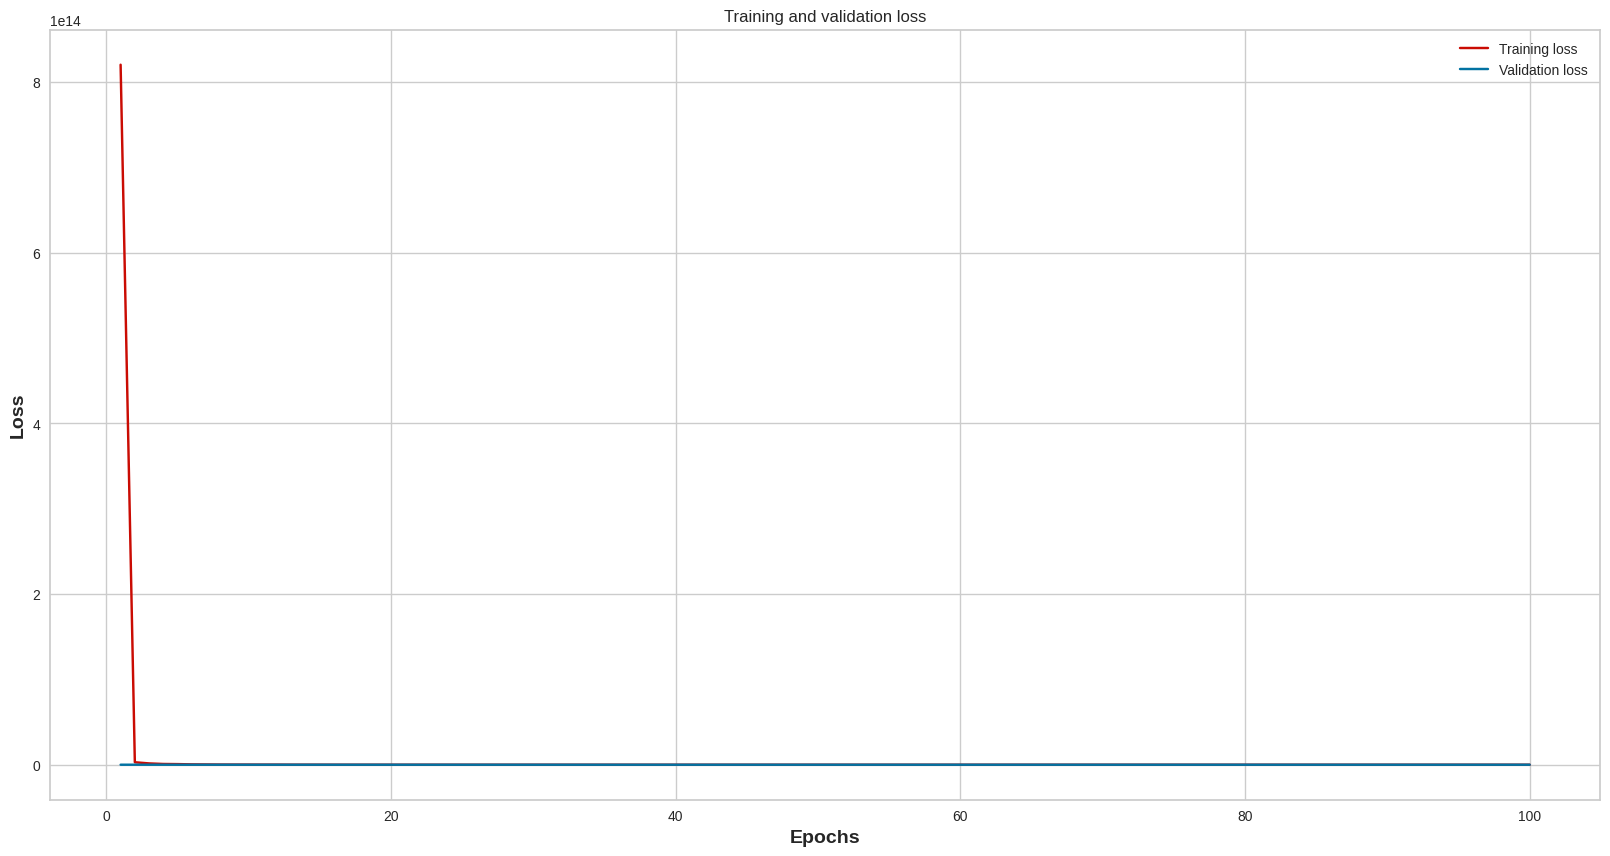

In [158]:
plt.figure(figsize=(20,10))
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss_train) + 1)

plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs',fontdict={'size':14,'weight':'bold'})
plt.ylabel('Loss',fontdict={'size':14,'weight':'bold'})
plt.legend()
plt.show()

In [159]:
model_dense = tf.keras.models.load_model("model_experiments/model_dense/")
evaluation = model_dense.evaluate(X_test, y_test)

print("Evaluation")
print(f"LOSS: {evaluation[0]}")
print(f"MAE: {evaluation[1]}")

1405/1405 [==============================] - 4s 2ms/step - loss: 135.7439 - mae: 7.8663
Evaluation
LOSS: 135.74392700195312
MAE: 7.866338729858398


In [160]:
# Train Predictions
y_pred_train_rna = model_dense.predict(X_train)

# Test Predictions
y_pred_test_rna = model_dense.predict(X_test)

1405/1405 [==============================] - 2s 1ms/step


In [161]:
# Train Metrics
metrics_evals(y_train, y_pred_train_rna)

{'MSE': 135.28157510871185,
 'RMSE': 11.631060790345472,
 'MAE': 7.838115906330525,
 'R2': -0.7953285056066968}

In [162]:
# Test Metrics
metrics_evals(y_test, y_pred_test_rna)

{'MSE': 135.74392041440157,
 'RMSE': 11.650919294819683,
 'MAE': 7.866305662234042,
 'R2': -0.8007050169479248}

## Leading Questions:

#### Problem statement Porter wants to provide estimated delivery times to its customers for food orders from various restaurants. The challenge is to estimate the delivery time based on factors such as the order details, pickup location, and the availability of delivery partners.

### Pandas datetime Functions.
####   pd.to_datetime(): Converts a string or a sequence of strings into a pandas datetime object.
####   pd.Timestamp(): Creates a pandas Timestamp object representing a specific date and time.
####   pd.date_range(): Generates a fixed frequency datetime index with regular intervals between the start and end dates.

### Outlier removal methods
#### Z-score method
#### Interquartile range (IQR) method
#### Visual Inspection thru scatter plot or Box Plot.

### Classical machine learning methods 
#### Linear Regression
#### Support Vector Regression
#### Gradient Boosting Regression
#### K-Nearest Neighbors (KNN) Regression

### Scaling in neural networks
#### Scaling is an important preprocessing step for neural networks because it helps to ensure that all input features are treated equally by the network during training. 

### Choice of optimizer.
#### Adam uses adaptive learning rates for each weight of the network, which means that the learning rate is adjusted automatically based on the gradient history of each weight. This helps to prevent the network from getting stuck in local minima and improves the convergence rate of the algorithm.

### Activation functions
### ReLU:
### Non-Linear:

#### ReLU is a non-linear activation function, which means that it can model non-linear relationships between the input features and the output variable. This allows neural networks to learn complex functions and patterns in the data. Computationally Efficient.

### Neural network and large dataset?
#### Ability to Learn Complex Patterns
#### Reduced Overfitting
#### Improved Optimization
#### Improved Regularization
#### Reduced Bias.